In [1]:
#library(GGally)
library(randomForest)
library(tree)
#library(GauPro)
#library(gam) #doesnt work for gam(...~ s(..., bs = ""))
library(mgcv)
library(boot)
library(splines)
library(janitor)
#install.packages("GauPro")
#library(GauPro)


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.

Registered S3 method overwritten by 'tree':
  method     from
  print.tree cli 

Loading required package: nlme

This is mgcv 1.8-40. For overview type 'help("mgcv-package")'.

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [2]:
AirQuality = (read.csv2("AirQualityUCI.csv")
    |> remove_empty(which = c("rows", "cols"))
)
AirQuality = AirQuality[!is.na(AirQuality),]
AirQuality = AirQuality[-c(16:17)]
AirQuality = AirQuality[-c(1:2)]
AirQuality = na.omit(AirQuality)

In [3]:
#gam.ns1 = lm(T ~ ns(CO.GT., 4) + ns(C6H6.GT., 5) + NOx.GT., data = AirQuality)
gam.s1 = gam(T ~ s(CO.GT.,k = 4, bs = "gp") + s(C6H6.GT., k = 5, bs = "gp") + s(NOx.GT., bs = "gp"), data = AirQuality)

In [4]:
gam.s2 = gam(T ~ s(CO.GT., bs = "gp") + s(C6H6.GT., bs = "gp") + NOx.GT., data = AirQuality)
gam.s3 = gam(T ~ s(C6H6.GT., bs = "gp") + s(NO2.GT., bs = "gp"), data = AirQuality)
gam.s4 = gam(T ~ s(C6H6.GT., bs = "gp")+ s(NO2.GT., bs = "gp") + s(NOx.GT.,bs = "gp"), data = AirQuality)
gam.s5 = gam(T ~ C6H6.GT. + s(NO2.GT., bs = "gp") + s(NOx.GT.,bs = "gp"), data = AirQuality)

# so from what i can see, when we predict using gam and s() on benzene, the others are practically useless
# Need to look at only the gases that greatly affect climate change, NO NO2 C6H6 CO 


Family: gaussian 
Link function: identity 

Formula:
T ~ s(CO.GT., k = 4, bs = "gp") + s(C6H6.GT., k = 5, bs = "gp") + 
    s(NOx.GT., bs = "gp")

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.77831    0.06921   141.3   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
               edf Ref.df         F p-value    
s(CO.GT.)    1.605  1.845     5.329  0.0073 ** 
s(C6H6.GT.)  4.000  4.000 91933.081  <2e-16 ***
s(NOx.GT.)  10.686 10.914   345.757  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.976   Deviance explained = 97.6%
GCV = 44.898  Scale est. = 44.815    n = 9357


Method: GCV   Optimizer: magic
Smoothing parameter selection converged after 27 iterations.
The RMS GCV score gradient at convergence was 0.0001608547 .
The Hessian was not positive definite.
Model rank =  19 / 19 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

               k'   edf k-index p-value  
s(CO.GT.)    3.00  1.61    0.99   0.200  
s(C6H6.GT.)  4.00  4.00    0.98   0.065 .
s(NOx.GT.)  11.00 10.69    1.01   0.715  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


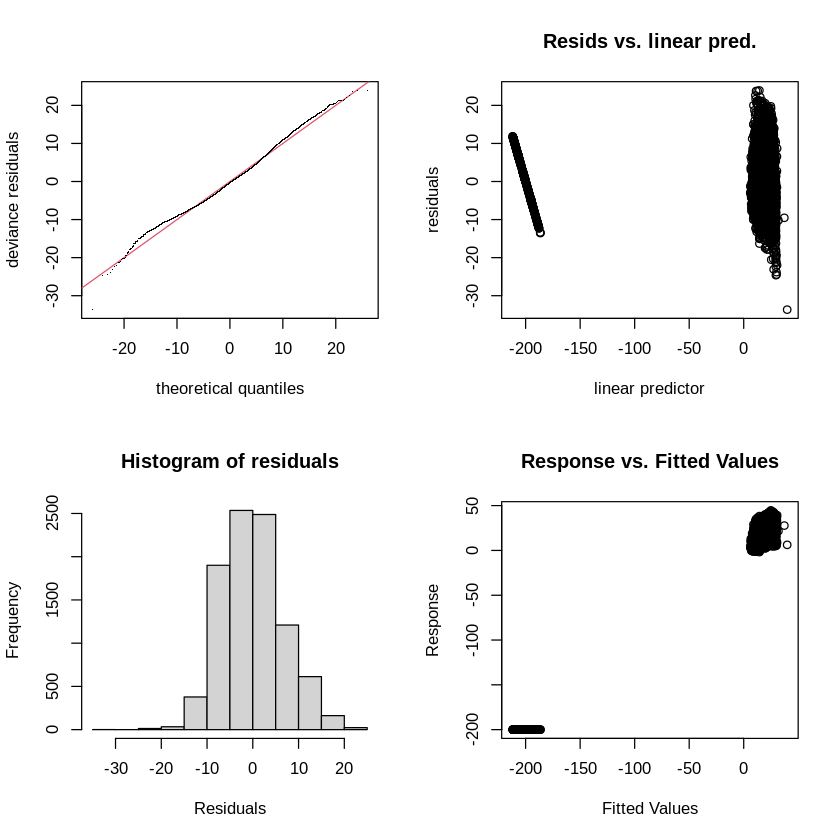

In [5]:
summary(gam.s1)
gam.check(gam.s1)


Family: gaussian 
Link function: identity 

Formula:
T ~ s(CO.GT., k = 5, bs = "gp") + s(C6H6.GT., k = 13, bs = "gp") + 
    s(NOx.GT., bs = "gp", k = 13)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.77831    0.06886     142   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
               edf Ref.df         F p-value    
s(CO.GT.)    1.979  2.005     6.511 0.00149 ** 
s(C6H6.GT.)  7.715  7.928 46810.730 < 2e-16 ***
s(NOx.GT.)  11.838 11.977   294.768 < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Rank: 25/29
R-sq.(adj) =  0.976   Deviance explained = 97.6%
GCV =  44.47  Scale est. = 44.363    n = 9357


Method: GCV   Optimizer: magic
Smoothing parameter selection converged after 23 iterations.
The RMS GCV score gradient at convergence was 0.01277301 .
The Hessian was not positive definite.
Model rank =  25 / 29 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

               k'   edf k-index p-value
s(CO.GT.)    4.00  1.98    0.98    0.10
s(C6H6.GT.) 12.00  7.71    1.00    0.53
s(NOx.GT.)  12.00 11.84    1.01    0.61


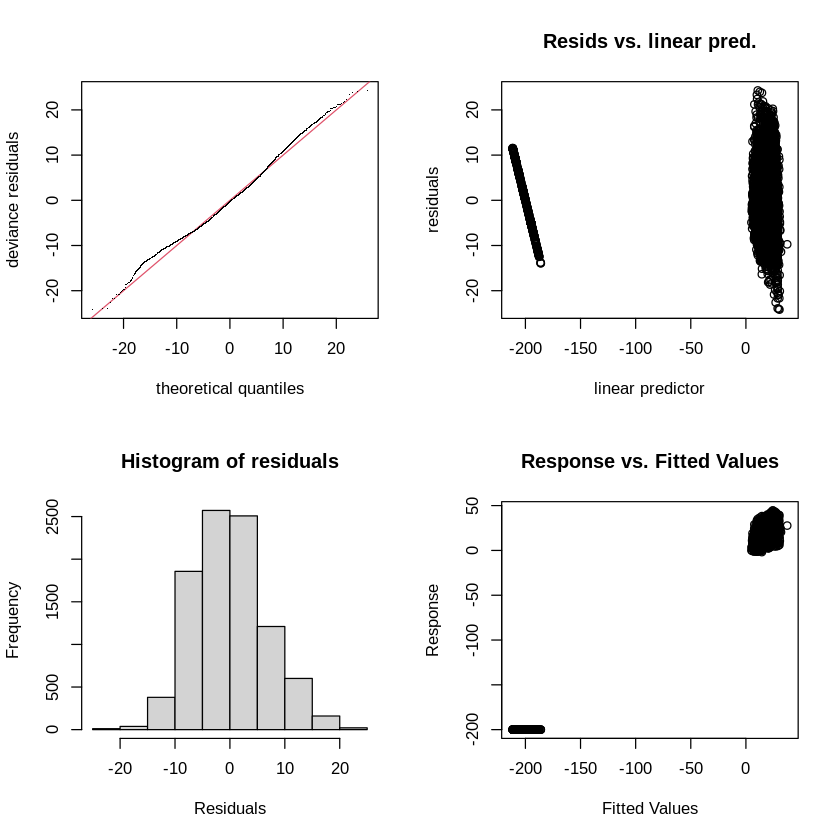

In [19]:
gam.s1 = gam(T ~ s(CO.GT.,k = 5, bs = "gp") + s(C6H6.GT., k = 13, bs = "gp") + s(NOx.GT., bs = "gp", k = 13), data = AirQuality)
summary(gam.s1)
gam.check(gam.s1)

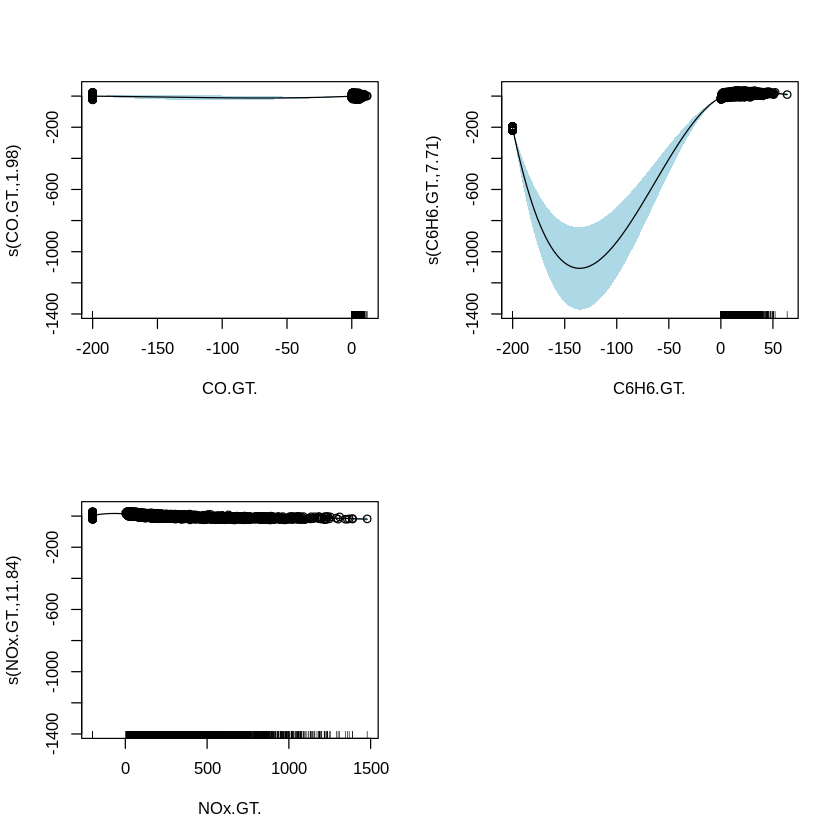

In [20]:
plot.gam(gam.s1, residuals = TRUE, pch =1, cex = 1, shade = 
         TRUE, shade.col = "lightblue", seWithMean = TRUE, 
         pages = 1, all.terms = TRUE)


Family: gaussian 
Link function: identity 

Formula:
T ~ s(CO.GT., bs = "gp") + s(C6H6.GT., bs = "gp") + NOx.GT.

Parametric coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.6390672  0.1144274  110.45   <2e-16 ***
NOx.GT.     -0.0169660  0.0005068  -33.48   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
              edf Ref.df        F p-value    
s(CO.GT.)   2.246  2.461    45.09  <2e-16 ***
s(C6H6.GT.) 5.870  6.706 45671.71  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Rank: 17/24
R-sq.(adj) =  0.971   Deviance explained = 97.1%
GCV = 54.237  Scale est. = 54.179    n = 9357


Method: GCV   Optimizer: magic
Smoothing parameter selection converged after 11 iterations by steepest
descent step failure.
The RMS GCV score gradient at convergence was 0.2305493 .
The Hessian was not positive definite.
Model rank =  17 / 24 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

               k'   edf k-index p-value
s(CO.GT.)   11.00  2.25    1.00    0.56
s(C6H6.GT.) 11.00  5.87    1.01    0.73


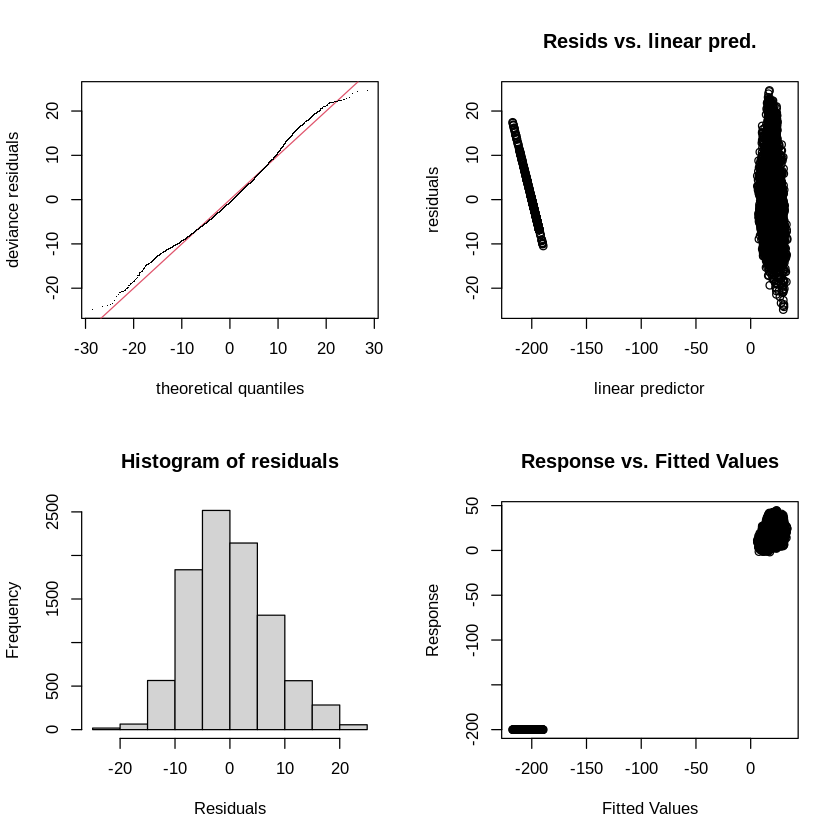

In [8]:
summary(gam.s2)
gam.check(gam.s2)

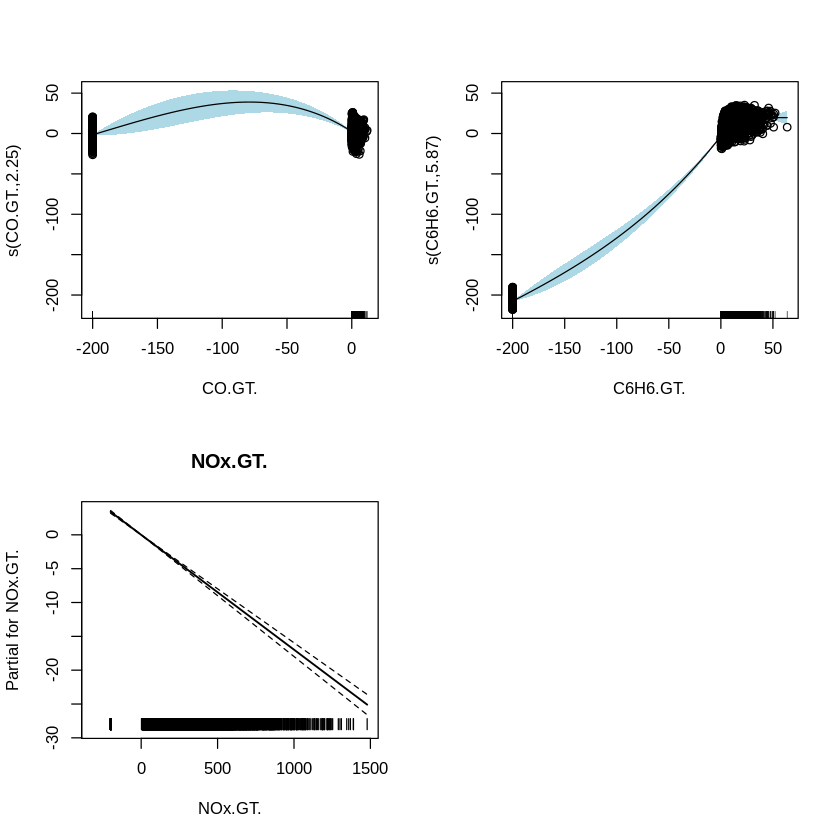

In [9]:
plot.gam(gam.s2, residuals = TRUE, pch =1, cex = 1, shade = 
         TRUE, shade.col = "lightblue", seWithMean = TRUE, 
         pages = 1, all.terms = TRUE)


Family: gaussian 
Link function: identity 

Formula:
T ~ s(C6H6.GT., bs = "gp") + s(NO2.GT., bs = "gp")

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.77831    0.07604   128.6   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
              edf Ref.df       F p-value    
s(C6H6.GT.) 7.496  8.302 36792.8  <2e-16 ***
s(NO2.GT.)  7.462  8.294   279.1  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.971   Deviance explained = 97.1%
GCV = 54.189  Scale est. = 54.097    n = 9357


Method: GCV   Optimizer: magic
Smoothing parameter selection converged after 9 iterations by steepest
descent step failure.
The RMS GCV score gradient at convergence was 0.00449914 .
The Hessian was positive definite.
Model rank =  23 / 23 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

               k'   edf k-index p-value  
s(C6H6.GT.) 11.00  7.50    0.98   0.055 .
s(NO2.GT.)  11.00  7.46    1.01   0.850  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


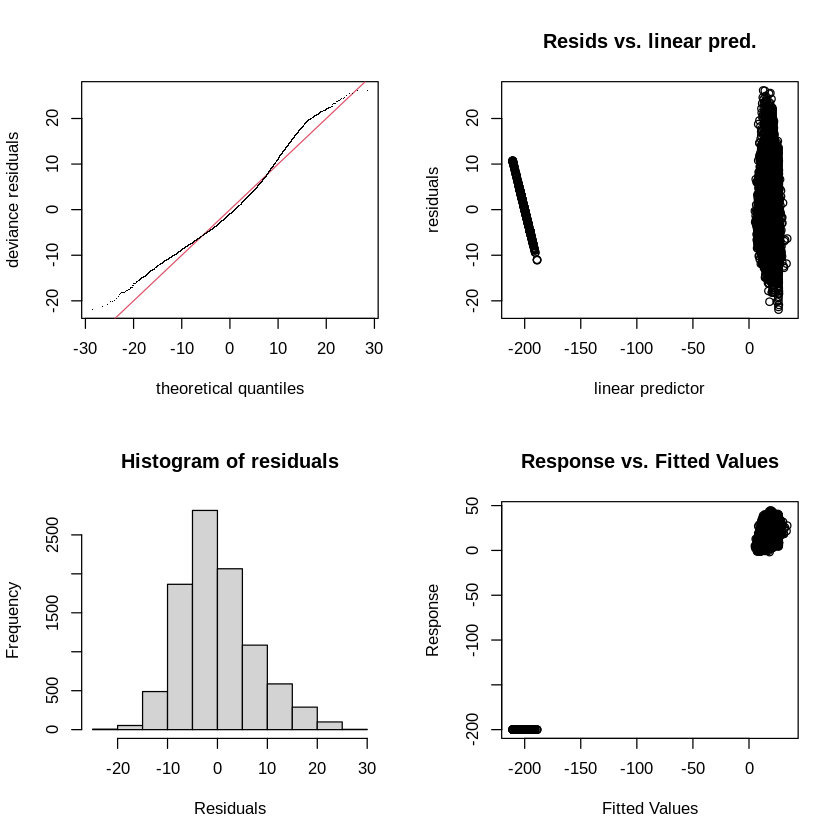

In [10]:
summary(gam.s3)
gam.check(gam.s3)


Family: gaussian 
Link function: identity 

Formula:
T ~ s(C6H6.GT., bs = "gp", k = 100) + s(NO2.GT., bs = "gp", k = 15)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.77831    0.07576   129.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
              edf Ref.df     F p-value    
s(C6H6.GT.) 8.862  8.983 34253  <2e-16 ***
s(NO2.GT.)  8.738 10.036   237  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Rank: 24/114
R-sq.(adj) =  0.971   Deviance explained = 97.1%
GCV = 53.819  Scale est. = 53.712    n = 9357


Method: GCV   Optimizer: magic
Smoothing parameter selection converged after 6 iterations by steepest
descent step failure.
The RMS GCV score gradient at convergence was 0.007944521 .
The Hessian was not positive definite.
Model rank =  24 / 114 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

               k'   edf k-index p-value   
s(C6H6.GT.) 99.00  8.86    0.97   0.005 **
s(NO2.GT.)  14.00  8.74    1.01   0.625   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


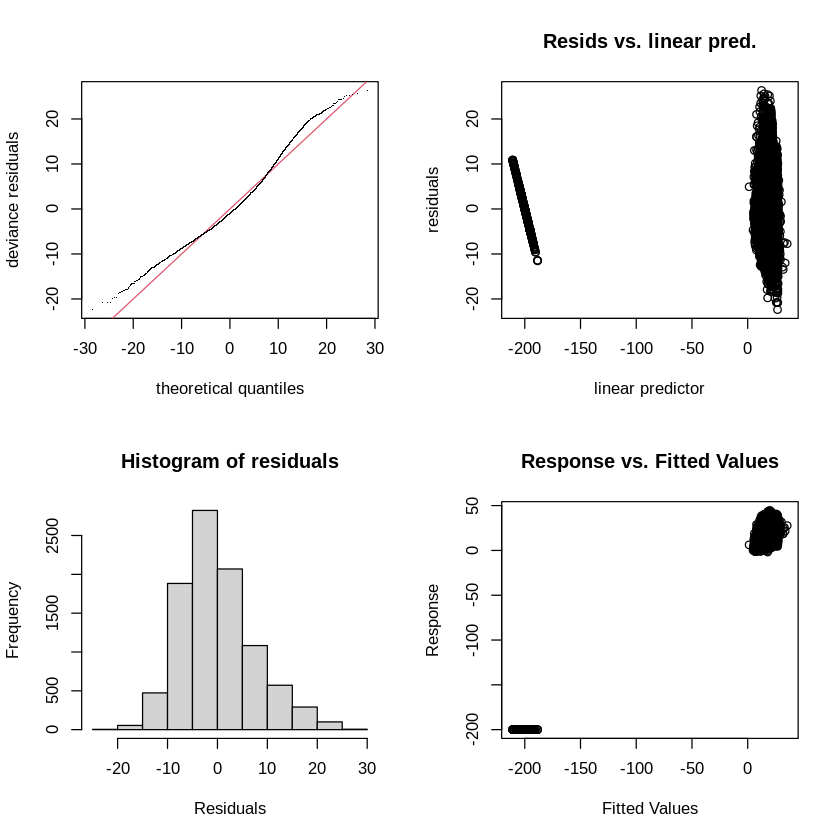

In [11]:
gam.s3 = gam(T ~ s(C6H6.GT., bs = "gp", k = 100) + s(NO2.GT., bs = "gp", k = 15), data = AirQuality)
summary(gam.s3)
gam.check(gam.s3)

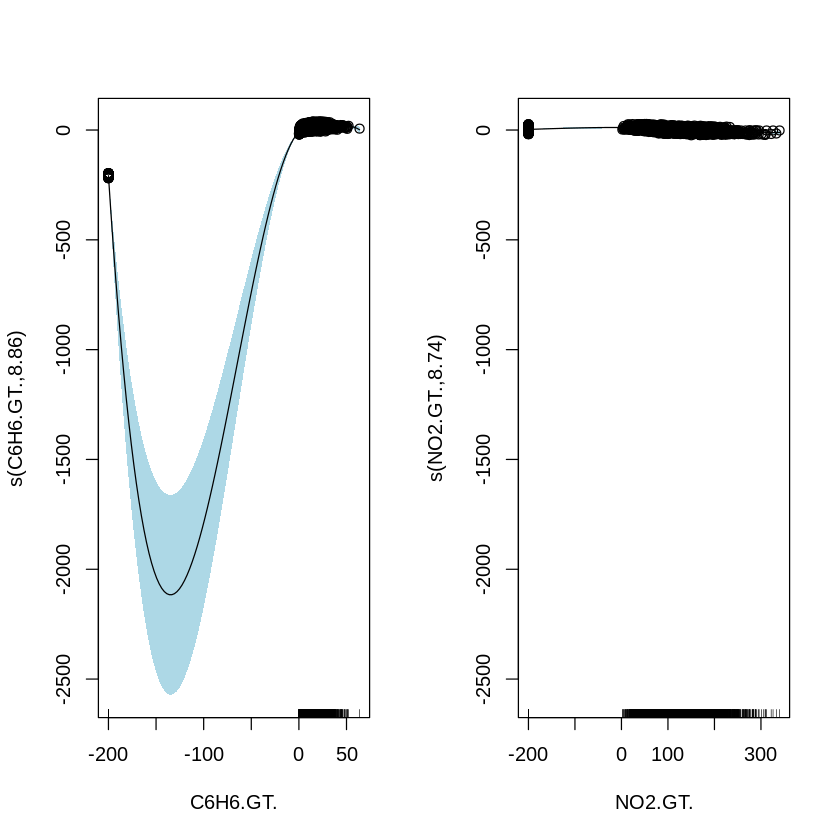

In [12]:
plot.gam(gam.s3, residuals = TRUE, pch =1, cex = 1, shade = 
         TRUE, shade.col = "lightblue", seWithMean = TRUE, 
         pages = 1, all.terms = TRUE)


Family: gaussian 
Link function: identity 

Formula:
T ~ s(C6H6.GT., bs = "gp") + s(NO2.GT., bs = "gp") + s(NOx.GT., 
    bs = "gp")

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.7783     0.0687   142.3   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
               edf Ref.df         F p-value    
s(C6H6.GT.)  6.920  6.996 53722.140  <2e-16 ***
s(NO2.GT.)   7.834  8.569     8.505  <2e-16 ***
s(NOx.GT.)  10.574 10.868   191.461  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Rank: 30/34
R-sq.(adj) =  0.976   Deviance explained = 97.6%
GCV = 44.285  Scale est. = 44.16     n = 9357


Method: GCV   Optimizer: magic
Smoothing parameter selection converged after 18 iterations by steepest
descent step failure.
The RMS GCV score gradient at convergence was 0.001576394 .
The Hessian was positive definite.
Model rank =  30 / 34 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

               k'   edf k-index p-value   
s(C6H6.GT.) 11.00  6.92    0.97   0.005 **
s(NO2.GT.)  11.00  7.83    1.00   0.315   
s(NOx.GT.)  11.00 10.57    1.02   0.890   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


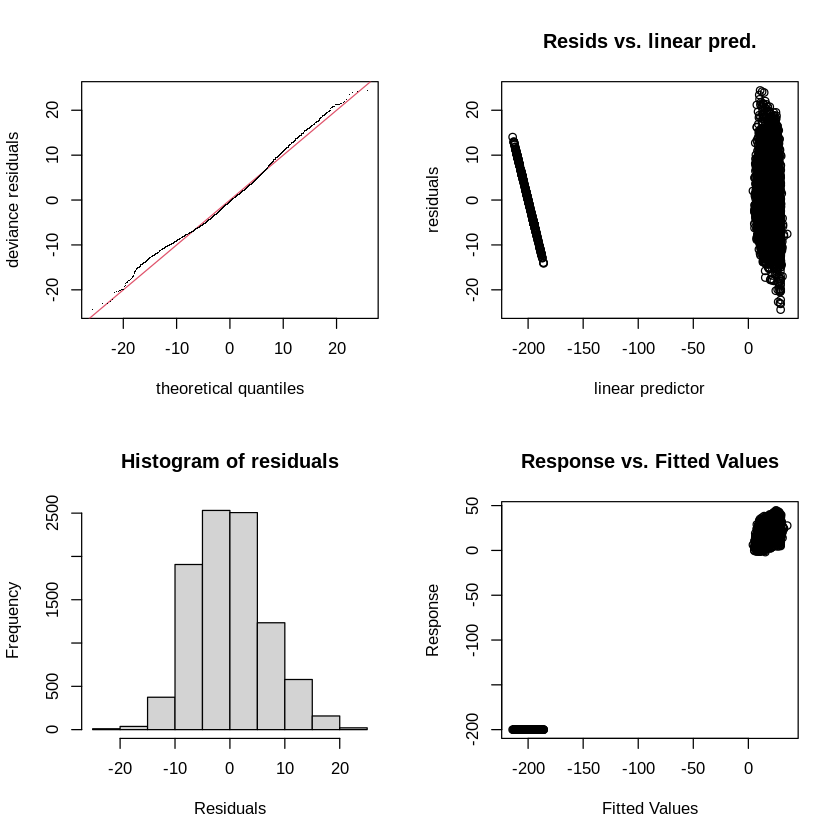

In [13]:
summary(gam.s4)
gam.check(gam.s4)


Family: gaussian 
Link function: identity 

Formula:
T ~ s(C6H6.GT., bs = "gp", k = 15) + s(NO2.GT., bs = "gp", k = 15) + 
    s(NOx.GT., bs = "gp", k = 15)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.77831    0.06865   142.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
               edf Ref.df         F p-value    
s(C6H6.GT.)  6.921  6.997 53789.868  <2e-16 ***
s(NO2.GT.)   8.611  9.976     7.419  <2e-16 ***
s(NOx.GT.)  13.984 13.998   150.225  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Rank: 36/43
R-sq.(adj) =  0.976   Deviance explained = 97.6%
GCV = 44.245  Scale est. = 44.101    n = 9357


Method: GCV   Optimizer: magic
Smoothing parameter selection converged after 20 iterations by steepest
descent step failure.
The RMS GCV score gradient at convergence was 0.001745132 .
The Hessian was positive definite.
Model rank =  36 / 43 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

               k'   edf k-index p-value
s(C6H6.GT.) 14.00  6.92    1.00    0.42
s(NO2.GT.)  14.00  8.61    1.02    0.94
s(NOx.GT.)  14.00 13.98    0.99    0.26


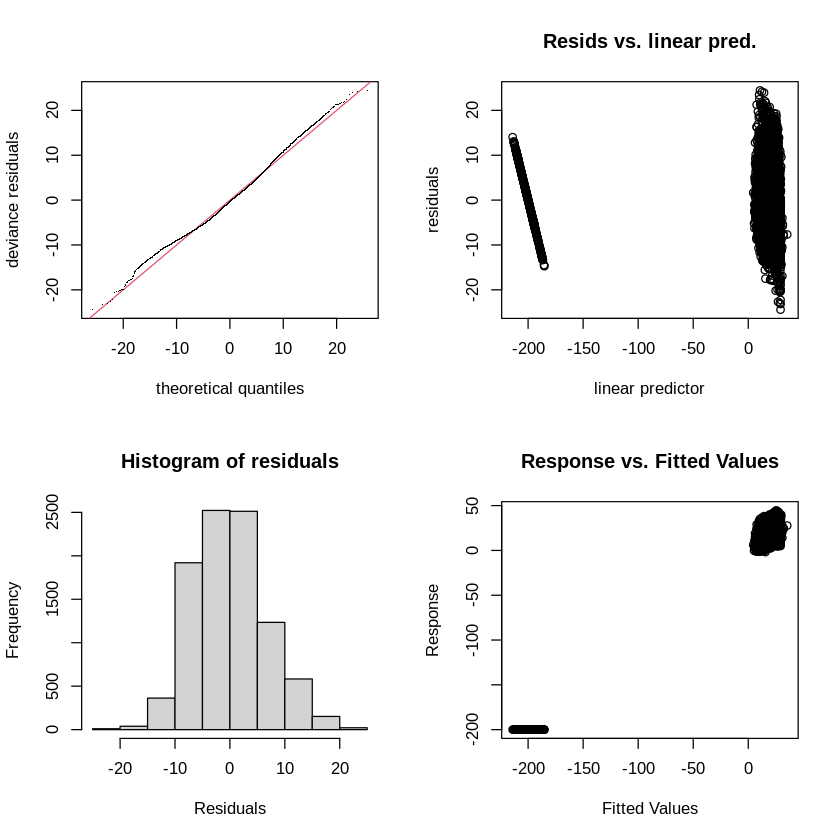

In [14]:
gam.s4 = gam(T ~ s(C6H6.GT., bs = "gp", k = 15)+ s(NO2.GT., bs = "gp", k = 15) + s(NOx.GT.,bs = "gp", k = 15), data = AirQuality)
summary(gam.s4)
gam.check(gam.s4)

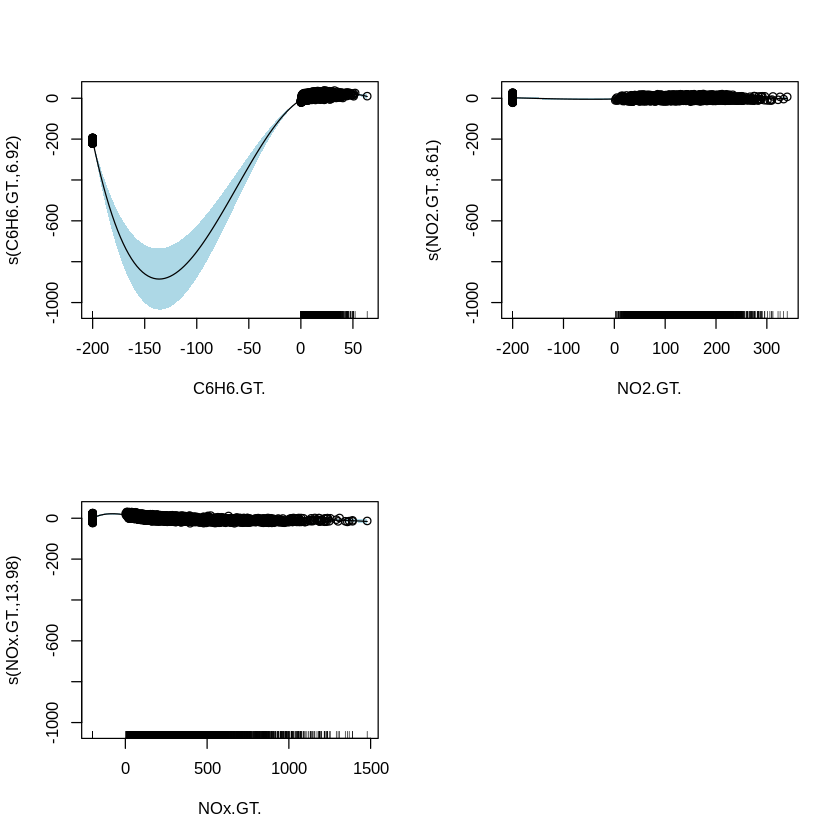

In [15]:
plot.gam(gam.s4, residuals = TRUE, pch =1, cex = 1, shade = 
         TRUE, shade.col = "lightblue", seWithMean = TRUE, 
         pages = 1, all.terms = TRUE)


Family: gaussian 
Link function: identity 

Formula:
T ~ C6H6.GT. + s(NO2.GT., bs = "gp") + s(NOx.GT., bs = "gp")

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.876416   0.076934   102.4   <2e-16 ***
C6H6.GT.    1.019406   0.001875   543.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
              edf Ref.df       F p-value    
s(NO2.GT.)  8.063  8.704   7.147  <2e-16 ***
s(NOx.GT.) 10.728 10.944 275.140  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =   0.97   Deviance explained =   97%
GCV = 55.392  Scale est. = 55.269    n = 9357


Method: GCV   Optimizer: magic
Smoothing parameter selection converged after 14 iterations.
The RMS GCV score gradient at convergence was 2.035864e-05 .
The Hessian was positive definite.
Model rank =  24 / 24 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

              k'   edf k-index p-value
s(NO2.GT.) 11.00  8.06    1.01    0.78
s(NOx.GT.) 11.00 10.73    1.01    0.79


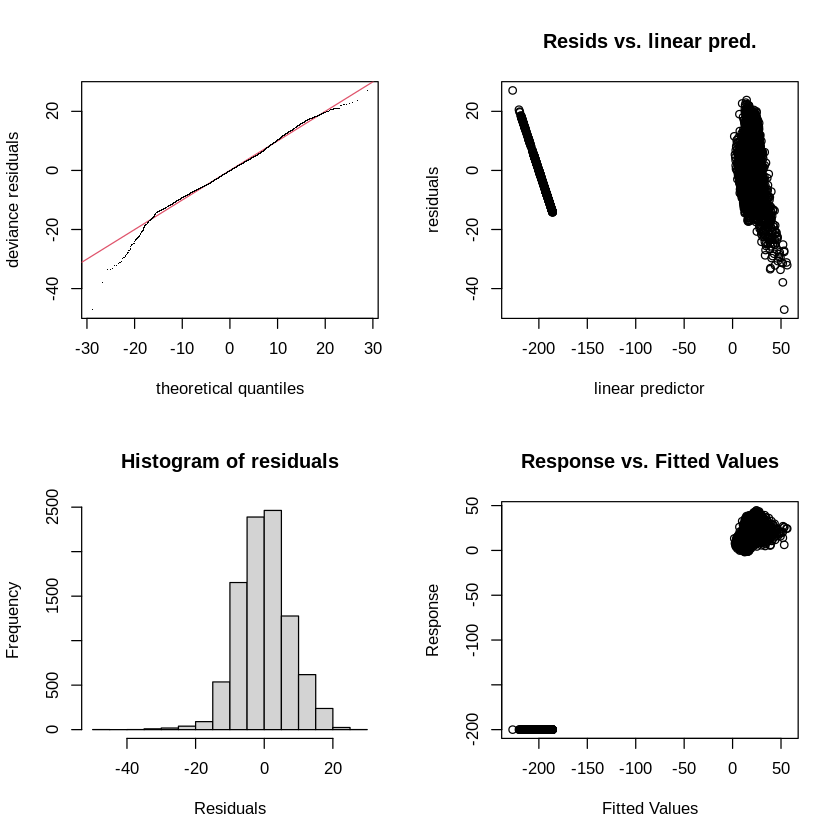

In [16]:
summary(gam.s5)
gam.check(gam.s5)


Family: gaussian 
Link function: identity 

Formula:
T ~ C6H6.GT. + s(NO2.GT., bs = "gp", k = 13) + s(NOx.GT., bs = "gp", 
    k = 13)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.876389   0.076935   102.4   <2e-16 ***
C6H6.GT.    1.019421   0.001875   543.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
              edf Ref.df       F p-value    
s(NO2.GT.)  8.511  9.389   6.508  <2e-16 ***
s(NOx.GT.) 11.748 11.948 252.258  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =   0.97   Deviance explained =   97%
GCV = 55.402  Scale est. = 55.27     n = 9357


Method: GCV   Optimizer: magic
Smoothing parameter selection converged after 12 iterations.
The RMS GCV score gradient at convergence was 6.890046e-05 .
The Hessian was positive definite.
Model rank =  26 / 26 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

              k'   edf k-index p-value
s(NO2.GT.) 12.00  8.51    1.03    0.96
s(NOx.GT.) 12.00 11.75    1.03    0.98


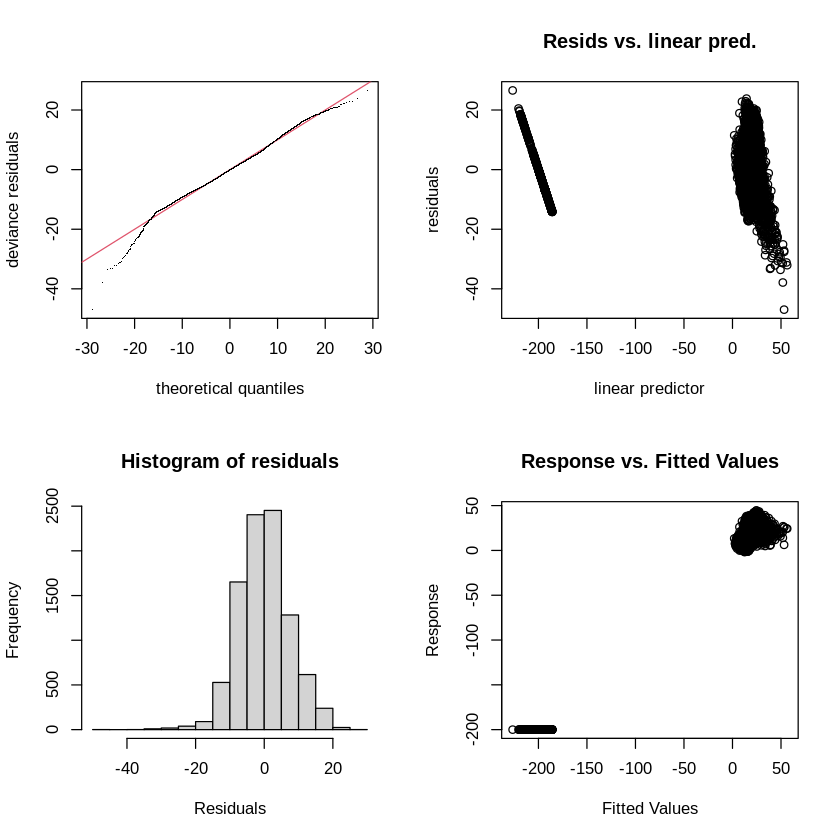

In [17]:
gam.s5 = gam(T ~ C6H6.GT. + s(NO2.GT., bs = "gp", k = 13) + s(NOx.GT.,bs = "gp", k = 13), data = AirQuality)
summary(gam.s5)
gam.check(gam.s5)

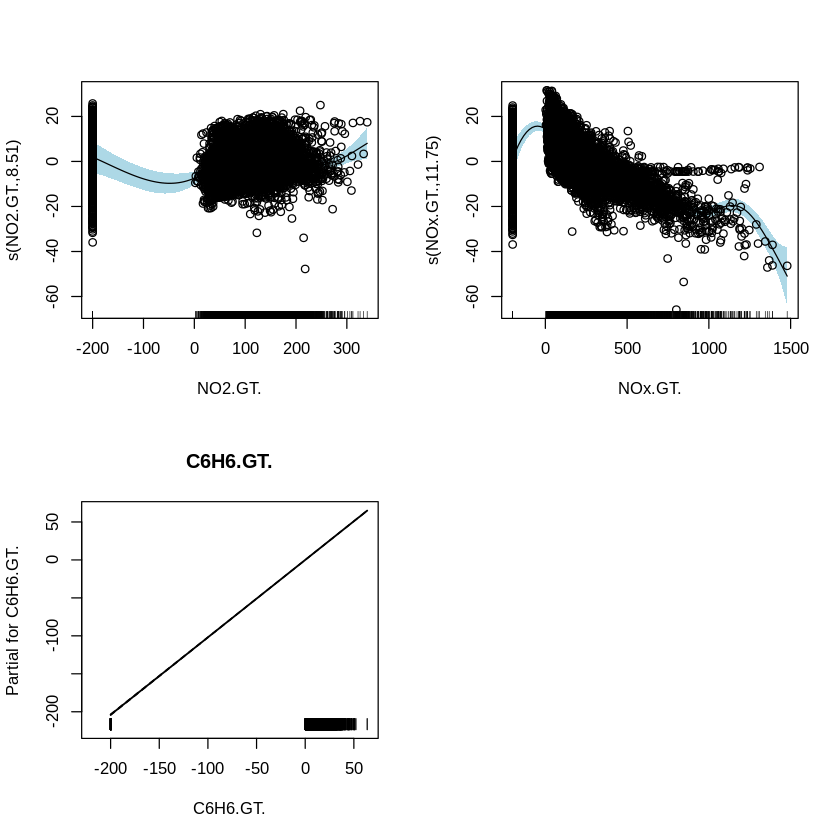

In [18]:
plot.gam(gam.s5, residuals = TRUE, pch =1, cex = 1, shade = 
         TRUE, shade.col = "lightblue", seWithMean = TRUE, 
         pages = 1, all.terms = TRUE)
lines()

AirQualityDirty = read.csv("AirQualityUCI.csv", sep= ";")
AirQuality = AirQualityDirty[!is.na(AirQualityDirty),]
#ncol(AirQuality)
AirQuality = AirQuality[-c(16:17)]
AirQuality = AirQuality[!is.na(AirQuality$T),]
AirQuality = na.omit(AirQuality)

AirQuality$CO.GT. = as.numeric(gsub(",", ".", AirQuality$CO.GT))
AirQuality$C6H6.GT. = as.numeric(gsub(",", ".", AirQuality$C6H6.GT.))
AirQuality$T = as.numeric(gsub(",", ".", AirQuality$T))
AirQuality$RH = as.numeric(gsub(",", ".", AirQuality$RH))
AirQuality$AH = as.numeric(gsub(",", ".", AirQuality$AH))

AirQuality = AirQuality[-c(1:2)]

library(boot)
glm.fit = glm(T ~ -RH - AH, data = AirQuality)
cv.err = cv.glm(AirQuality, glm.fit)
cv.err$delta

#summary(lm.fit)

# training stuff starts

train = sample(1:nrow(AirQuality), nrow(AirQuality)/2)
set.seed(1)
bag.AirQual = randomForest(T ~ ., data = AirQuality, subset = train, mtry = (ncol(AirQuality)-1), importance = TRUE)

bag.AirQual

AirQual.test = AirQuality[-train, -(ncol(AirQuality)-1)]
AirQual.train = AirQuality[train, -(ncol(AirQuality)-1)]
yhat.bag = predict(bag.AirQual, newdata = AirQuality[-train,])
plot(yhat.bag, AirQual.test$T, xlim = c(0,50),ylim = c(0,50))
abline(0,1)
mean((yhat.bag - AirQual.test$T)^2)

importance(bag.AirQual)

varImpPlot(bag.AirQual)

# Training Stuff ends